<a href="https://colab.research.google.com/github/Sawaiz8/Animal-Classification/blob/With-DATA-Aug-But-results-not-good/Animal_Classification_with_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d utkarshsaxenadn/animal-image-classification-dataset

 99% 1.59G/1.61G [00:13<00:00, 172MB/s]
100% 1.61G/1.61G [00:13<00:00, 129MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/animal-image-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten, BatchNormalization,Dropout


In [ ]:
#Keras uses generators --> it divides the images into batches and loads only a batch in the RAM
from keras import utils
#it stores the training data in a numpy array

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#ImageDataGenerator
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range= 0.2,
    zoom_range =0.2,
    horizontal_flip= True 
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

train_generator = train_datagen.flow_from_directory(
    '/content/Animal Classification/Animal Classification/Training Data',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'sparse',
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Animal Classification/Animal Classification/Testing Data',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'sparse'
)




Found 7500 images belonging to 5 classes.
Found 1202 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu',
                 input_shape = (256,256, 3)
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu'
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu'
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu', kernel_regularizer= keras.regularizers.L2(l2=0.05)))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu', kernel_regularizer= keras.regularizers.L2(l2=0.05)))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history =model.fit_generator(train_generator, epochs = 10, validation_data = validation_generator)
#My accuracy is lower for some reason. Have to investigate

<ipython-input-10-90b82c62ff00>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(train_generator, epochs = 10, validation_data = validation_generator)


Epoch 1/10
469/469 [==============================] - 148s 297ms/step - loss: 15.7372 - accuracy: 0.3077 - val_loss: 5.5671 - val_accuracy: 0.3095
Epoch 2/10
469/469 [==============================] - 136s 290ms/step - loss: 4.6674 - accuracy: 0.3365 - val_loss: 3.4158 - val_accuracy: 0.4218
Epoch 3/10
469/469 [==============================] - 134s 286ms/step - loss: 3.7019 - accuracy: 0.4103 - val_loss: 4.4117 - val_accuracy: 0.3228
Epoch 4/10
469/469 [==============================] - 135s 289ms/step - loss: 3.1340 - accuracy: 0.4877 - val_loss: 2.6580 - val_accuracy: 0.5416
Epoch 5/10
469/469 [==============================] - 134s 287ms/step - loss: 2.6507 - accuracy: 0.5357 - val_loss: 2.8733 - val_accuracy: 0.4917
Epoch 6/10
469/469 [==============================] - 134s 286ms/step - loss: 2.5540 - accuracy: 0.5669 - val_loss: 2.9049 - val_accuracy: 0.5458
Epoch 7/10
469/469 [==============================] - 133s 285ms/step - loss: 2.6438 - accuracy: 0.5959 - val_loss: 2.7384 

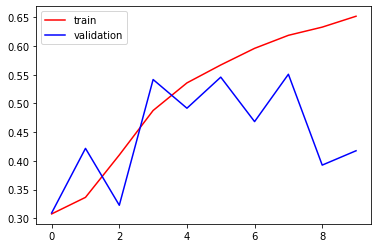

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()

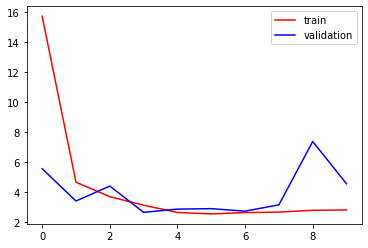

In [ ]:
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()